--------------------------------------------------
 [ Reading data from url ] 
:   gender     height      weight
0   Male  68.781904  162.310473
1   Male  74.110105  212.740856
2   Male  71.730978  220.042470
3   Male  69.881796  206.349801
4   Male  67.253016  152.212156
--------------------------------------------------
 [ Reading data from url with weight in kg and height in cm ] 
:   gender      height     weight
0   Male  174.706036  73.622792
1   Male  188.239668  96.497629
2   Male  182.196685  99.809586
3   Male  177.499761  93.598695
4   Male  170.822660  69.042272


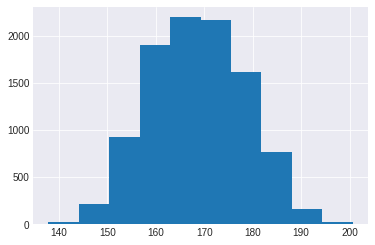

In [4]:
# data storing structures
# -> Pandas DataFrames
import pandas as pd
# Scientific modules
import scipy as sp
import scipy.stats as stats
# numerical modules, arrays, functions (log, sin, etc)
import numpy as np
# plotting facilities
import matplotlib.pyplot as plt  # high level plotting library
import seaborn as sns
from sklearn.neighbors import KernelDensity

# set specific style for figures, "theme"
plt.style.use('seaborn-darkgrid')


def header(msg):
    print('-' * 50)
    print(' [ ' + msg + ' ] ')


def value(msg, value):
    print(msg + ':', value)


url = 'https://raw.githubusercontent.com/ramashanker/ML_for_Hackers/master/02-Exploration/data/01_heights_weights_genders.csv'
data_gwh = pd.read_csv(url, sep=',', header=1, names=['gender', 'height', 'weight'])
header('Reading data from url')
value('', data_gwh.head())

# convert unit height to feet to cm and weight lbs to kg.
header('Reading data from url with weight in kg and height in cm')
data_gwh.height = data_gwh.height * 2.54
data_gwh.weight = data_gwh.weight * 0.45359237
value('', data_gwh.head())

#Histogram with data frame with hist.
data_gwh['height'].hist()

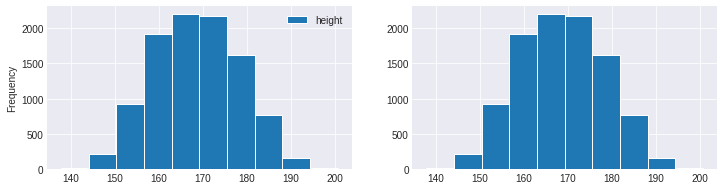

In [5]:
#Histogram with different library.
#figsize : (float, float), optional, default: None width, height in inches. 
#If not provided, defaults to:rc:`figure.figsize` = ``[6.4, 4.8]``.
plt.figure(figsize=(12,3)); 
ax1= plt.subplot(121)

# Pandas:
data_gwh.plot(y=['height'], kind='hist',bins=10, edgecolor='w', ax=ax1); 

ax2 = plt.subplot(122)

# Matplotlib:
ax2.hist(data_gwh.height, edgecolor='w');

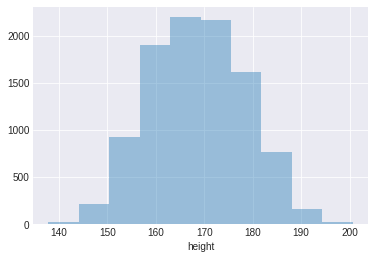

In [6]:
#seaborn:
#plt.figure() help to plot below the existing plot kde true 
plt.figure()
sns.distplot(data_gwh['height'], bins=10, kde=False);

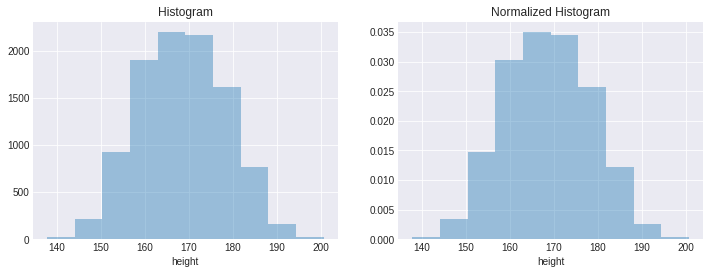

In [7]:
#Plot with without normalization with normalize
plt.figure(figsize=(12,4)); 
ax1= plt.subplot(121) 
sns.distplot(data_gwh['height'], bins=10, kde=False, ax=ax1);
plt.title('Histogram');
ax2 = plt.subplot(122)
sns.distplot(data_gwh['height'], bins=10, kde=False, norm_hist=True, ax=ax2); 
plt.title('Normalized Histogram');

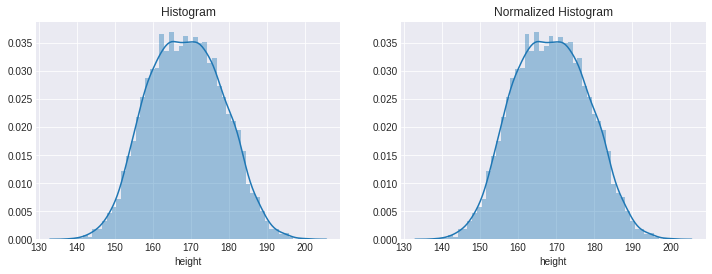

In [8]:
#Understanding KDE:A KDE visualizes the underlying distribution of the data better kde=true
#KDE= Kernel Density Estimate 
plt.figure(figsize=(12,4)); 
ax1= plt.subplot(121) 
#kde= true also normalize the data you can both the graph display the same
sns.distplot(data_gwh['height'], bins=50, kde=True, ax=ax1);
plt.title('Histogram');
ax2 = plt.subplot(122)
sns.distplot(data_gwh['height'], bins=50, kde=True, norm_hist=True, ax=ax2); 
plt.title('Normalized Histogram');

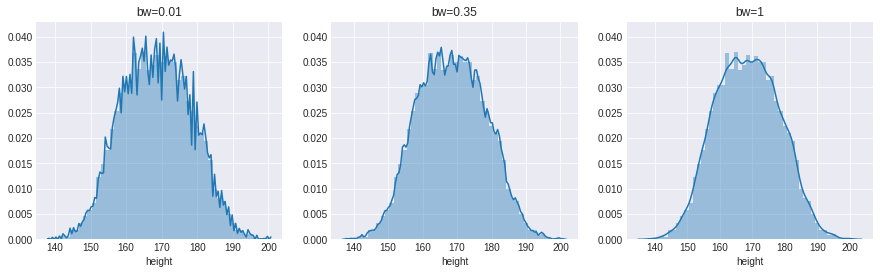

In [9]:
#KDE with band width(bw) The surface under the curve is 1; i
#it is normalized and gives the probability density
#sns.distplot(data_gwh['height'], bins=50, kde=True, kde_kws=dict(bw=X),ax=ax2);
plt.figure(figsize=(15,4));
ax1= plt.subplot(131);plt.title('bw=0.01')
sns.distplot(data_gwh['height'], bins=50, kde=True, kde_kws=dict(bw=0.01), ax=ax1);
ax2 = plt.subplot(132, sharey=ax1);
plt.title('bw=0.35') 
sns.distplot(data_gwh['height'], bins=50, kde=True, kde_kws=dict(bw=0.35), ax=ax2);
ax3 = plt.subplot(133, sharey=ax1);
plt.title('bw=1') 
sns.distplot(data_gwh['height'], bins=50, kde=True, kde_kws=dict(bw=1), ax=ax3);

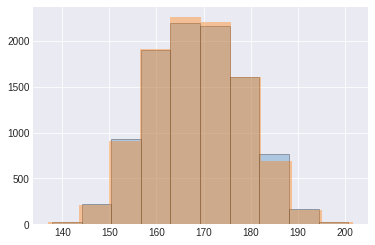

In [10]:
#KDE uses - simulations
sample = data_gwh.height.values # original data 
plt.hist(sample, edgecolor='k',alpha=0.3, density=False);
model = KernelDensity(bandwidth=1, kernel='gaussian') # make the KDE
sample = sample.reshape((len(sample), 1))
model.fit(sample)
new_sample = model.sample(10000)
#plt.figure()
sns.distplot(new_sample, kde=False, bins=10, kde_kws=dict(bw=1, kernel='gau'));

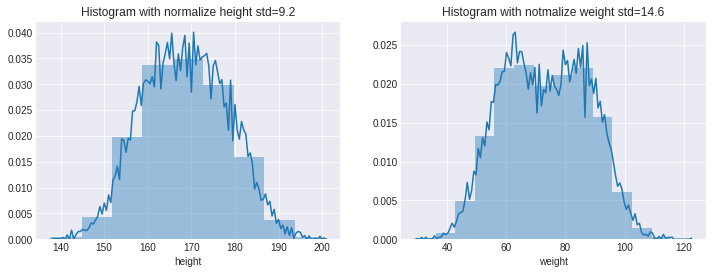

In [11]:
#Graph with standard deviation
plt.figure(figsize=(12,4)); 
ax1= plt.subplot(121) 
#kde= true also normalize the data you can both the graph display the same
sns.distplot(data_gwh['height'],  bins=int(data_gwh['height'].std()), kde=True, kde_kws=dict(bw=0.1), ax=ax1);
plt.title('Histogram with normalize height std=9.2');
ax2 = plt.subplot(122)
sns.distplot(data_gwh['weight'], bins=int(data_gwh['weight'].std()), kde=True, kde_kws=dict(bw=0.1), ax=ax2); 
plt.title('Histogram with notmalize weight std=14.6');

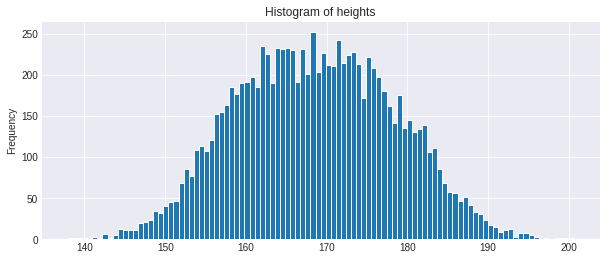

In [12]:
# plot with different bins
plt.figure(figsize=(10,4));
data_gwh.height.plot(kind='hist', bins=100, edgecolor='w', title='Histogram of heights'); 

153.02530854340043
184.44676965877605


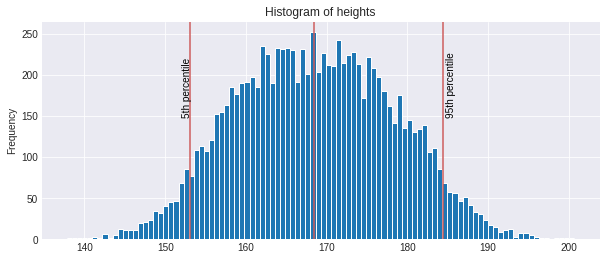

In [13]:
plt.figure(figsize=(10,4));

data_gwh.height.plot(kind='hist', bins=100, edgecolor='w', title='Histogram of heights'); 
q5 = data_gwh['height'].quantile(0.05);
print(q5)
#vertical line at 153.025
plt.axvline(q5, color='IndianRed');
#text print at x axis 152.025 and y axis 150
plt.text(q5-1,150,'5th percentile', rotation=90, color='k'); plt.axvline(data_gwh['height'].median(), color='IndianRed');
q95 = data_gwh['height'].quantile(0.95)
print(q95)
plt.axvline(q95, color='IndianRed');
plt.text(q95+0.3,150,'95th percentile', rotation=90, color='k');


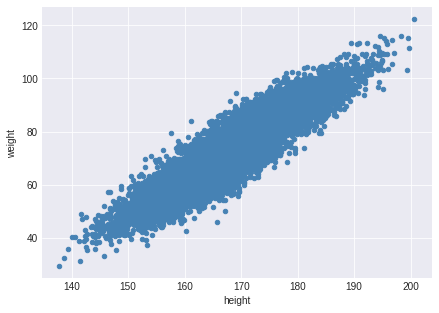

In [14]:
plt.figure(figsize=(7,5))
data_gwh.plot(x='height', y='weight',kind='scatter', marker='o', ax=plt.gca(), c='SteelBlue');
 

      gender      height     weight
0       Male  174.706036  73.622792
30      Male  188.045871  96.574454
60      Male  176.662093  89.847361
90      Male  165.702106  82.105650
120     Male  174.551844  81.859217
...      ...         ...        ...
9870  Female  170.395373  65.041414
9900  Female  167.496031  68.022506
9930  Female  159.908112  59.383058
9960  Female  169.605134  73.527593
9990  Female  159.097154  46.653592

[334 rows x 3 columns]


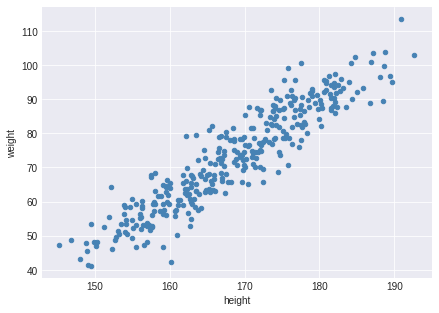

In [15]:
#::30 devide the entire data in 30 and then consider 30 item a one dots
#print(data_gwh)
plt.figure(figsize=(7,5))
print(data_gwh[::30])
data_gwh[::30].plot(x='height', y='weight',kind='scatter', marker='o', ax=plt.gca(), c='SteelBlue');
 

In [16]:
stats.pearsonr(data_gwh[::30]['height'], data_gwh[::30]['weight'])

(0.9275062507948275, 6.204564667185299e-144)

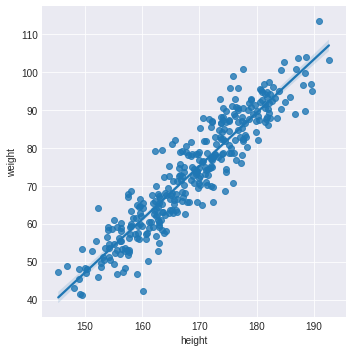

In [17]:
sns.lmplot(x='height', y='weight', data=data_gwh[::30]);
 

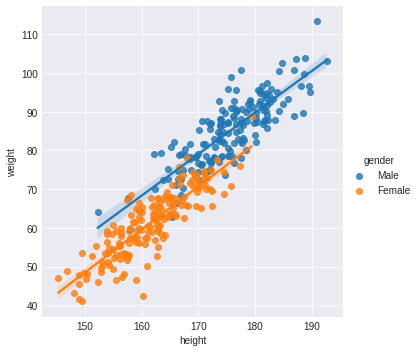

In [18]:
sns.lmplot(x='height', y='weight', data=data_gwh[::30], hue='gender');
 

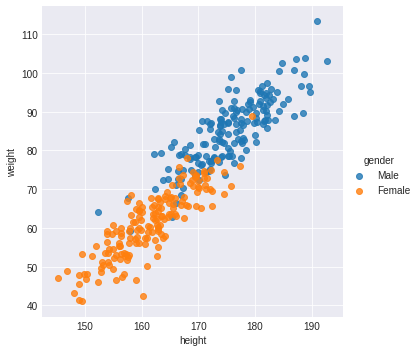

In [19]:
sns.lmplot(x='height', y='weight', data=data_gwh[::30], hue='gender', fit_reg=False);
 

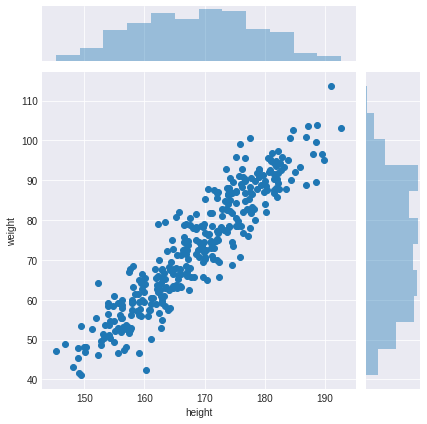

In [20]:
#joint plot its give the density on top and right the data distribution
sns.jointplot(x='height', y='weight', data=data_gwh[::30], kind='scatter');

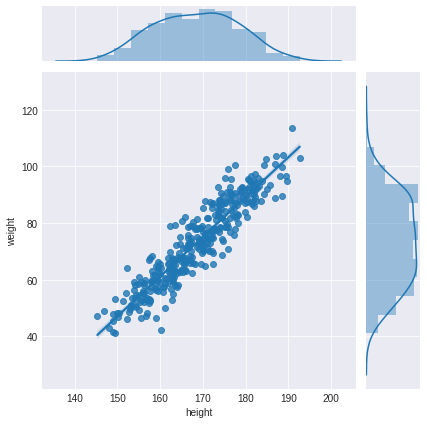

In [21]:
#Its gives the distribution graph for top and right
sns.jointplot(x='height', y='weight', data=data_gwh[::30], kind='reg');

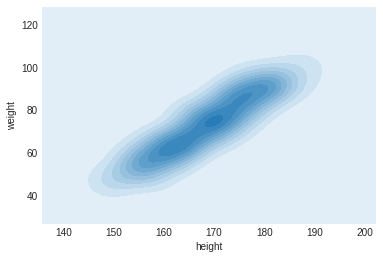

In [22]:
#It give spiral density of data distribution
sns.kdeplot(data_gwh[::30]['height'], data_gwh[::30]['weight'], shade=True);

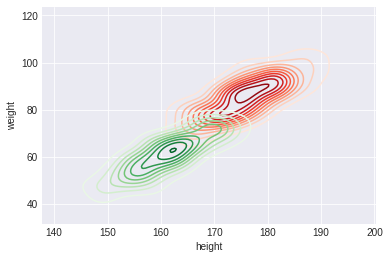

In [23]:
#devide the data in to 30 group and then filter out the gender
men = data_gwh[::30][data_gwh[::30]['gender'] == 'Male']; 
women = data_gwh[::30][data_gwh[::30]['gender'] == 'Female']

sns.kdeplot(men['height'], men['weight'], cmap='Reds') 
sns.kdeplot(women['height'], women['weight'], cmap='Greens');

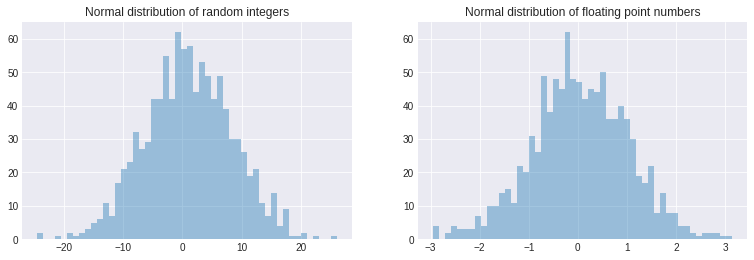

In [24]:
fig, ax = plt.subplots(1, 2, figsize=(13, 4))
ax[0].set_title('Normal distribution of random integers')
die_rolls = np.random.normal(1, 7, size=1000)
sns.distplot(die_rolls, bins=50, kde=False, ax=ax[0]);
ax[1].set_title('Normal distribution of floating point numbers');
uniform_numbers = np.random.normal(size=1000)
sns.distplot(uniform_numbers, bins=50, kde=False, ax=ax[1]);

19


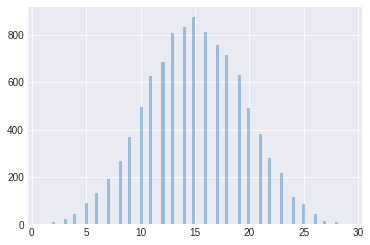

In [25]:
np.random.seed(777)

n_questions = 5
max_score_question = 6
def exam_score():
    scores = np.random.randint(0, max_score_question + 1, size=n_questions)
    #print(scores)
    total_score = sum(scores)
    return total_score
print(exam_score())

samples = [exam_score() for _ in range(10000)] 
samples[:10]

sns.distplot(samples, bins=100, kde=False);

